In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir
from time import time

from Algorithms.Functions.DE import DE
from Algorithms.Functions.PSO import PSO

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error


In [2]:

path = "."
lab_name = "Lab6"
if lab_name in listdir(path):
    path += "/" + lab_name
    if "Data" in listdir(path):
        path += "/Data"
        datas_path = [path + "/" + data for data in listdir(path)]
    else:
        raise Exception(f"Data directory in {lab_name} directory not found")
else:
    raise Exception(f"{lab_name} directory not found")

data = []
lts = [9, 10, 11]
lts = [10]
for data_path in datas_path:
    for i in lts:
        data.append(pd.read_excel(data_path, sheet_name=f"Var{i:02}"))

data = pd.concat(data)
data.reset_index(drop=True, inplace=True)
data

,y,x
0,10.07,77.6
1,14.73,114.9
2,17.94,141.1
3,23.93,190.8
4,29.61,239.9
5,35.18,289.0
6,40.02,332.8
7,44.82,378.4
8,50.76,434.8
9,55.05,477.3


In [3]:
dat = data.to_numpy()
dat

array([[ 10.07,  77.6 ],
       [ 14.73, 114.9 ],
       [ 17.94, 141.1 ],
       [ 23.93, 190.8 ],
       [ 29.61, 239.9 ],
       [ 35.18, 289.  ],
       [ 40.02, 332.8 ],
       [ 44.82, 378.4 ],
       [ 50.76, 434.8 ],
       [ 55.05, 477.3 ],
       [ 61.01, 536.8 ],
       [ 66.4 , 593.1 ],
       [ 75.47, 689.1 ],
       [ 81.78, 760.  ]])

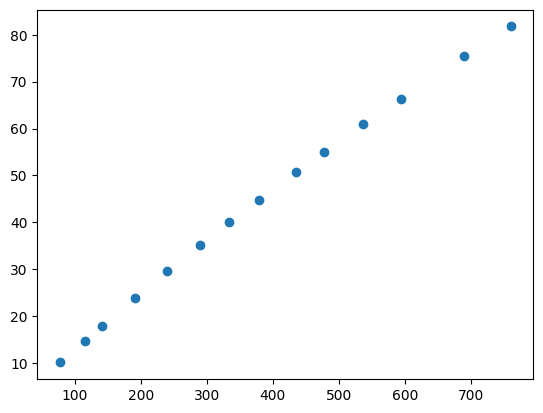

In [4]:
plt.scatter(dat[:, 1], dat[:, 0])

In [5]:
test, train = train_test_split(dat, test_size=0.25)

Processing: 100%|████████████████████████████████████████| 100/100 [00:01<00:00, 90.99step/s]


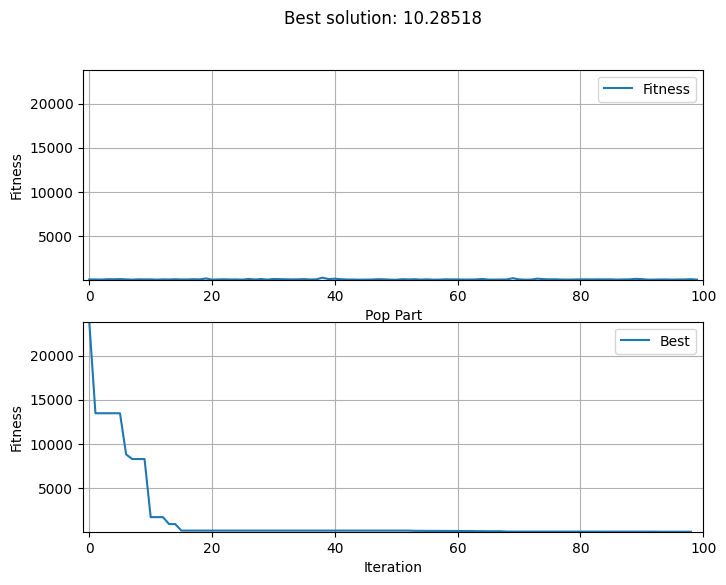

(np.float64(10.285184666699331), array([4.60873517e+02, 3.07917258e-04]))


In [9]:
def var9(X, dat):
    b1, b2, b3, b4, b5 = X
    return b1 + b2 * np.exp(-b4 * dat) + b3 * np.exp(-b5 * dat)

def var10(X, dat):
    b1, b2 = X
    return b1 * (1 - 1/(np.sqrt(1 + 2 * b2 * dat)))

def var11(X, dat):
    b1, b2 = X
    return (b1 * b2) / (1 + b2 * dat)

def funct9(X):
    return np.sum((dat[:, 0] - var9(X, dat[:, 1]))**2)

def funct10(X):
    return np.sum((dat[:, 0] - var10(X, dat[:, 1]))**2)

def funct11(X):
    return np.sum((dat[:, 0] - var11(X, dat[:, 1]))**2)

funct9_limits = [[0, 10], [0, 5], *[[-2, 2] for _ in range(3)]]
funct10_limits = [[100, 1000], [0, 1]]
funct11_limits = [[100, 1000], [0, 1]]

# de = DE(100, 100, funct9, funct9_limits, plot=True, d3=False, d2=False, static=True, inf=True)
de = DE(100, 100, funct10, funct10_limits, plot=True, d3=False, d2=False, static=True, inf=True)
# de = DE(100, 100, funct11, funct11_limits, plot=True, d3=False, d2=False, static=True, inf=True)
print(de)